# Decision Tree Task

In [30]:
# Import libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score
from sklearn import tree
import matplotlib.pyplot as plt
from sklearn.tree import export_graphviz
from IPython.display import Image
from subprocess import call

In [31]:
# Load the titanic dataset
titanic_df = pd.read_csv("titanic.csv")
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [32]:
# Print Information about the DataFrame
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [33]:
missing_values_count = titanic_df.isnull().sum()
missing_values_count

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [34]:
# Drop the columns, as it's not needed for analysis. 
titanic_df.drop(["Cabin", "Name", "SibSp", "Parch", "Ticket"], axis=1, inplace=True)

### One-Hot Encoding
One-hot encoding is a technique used to transform categorical variables into a numerical format, making them suitable for machine learning algorithms. It works by creating new binary columns for each unique category in the original variable, where each column represents one possible category. This way, the categorical data is converted into a format that algorithms can easily process without assuming any inherent order or priority between the categories. For instance, in the 'Sex' column, which contains categories such as 'male' and 'female', one-hot encoding would generate two new columns, one for each category, with a binary value of 1 or 0 to indicate the presence of that category for each record.

In [36]:
# Return unique values from the Sex column
titanic_df["Sex"].unique()

array(['male', 'female'], dtype=object)

Machine learning classifiers are unable to handle string values directly, so categorical data must be converted into a numerical form. There are two primary methods for doing this:

1. **Label Encoding**: This technique assigns a unique integer to each category, such as 0 for 'male' and 1 for 'female'. However, this approach introduces a problem—by using numbers, it suggests a ranking or order between the categories, which can confuse some machine learning models into thinking one category is inherently 'greater' than the other.

2. **One-Hot Encoding**: This method avoids the issue of implied order by creating separate binary columns for each category. For example, instead of assigning numbers to 'male' and 'female', one-hot encoding creates two new columns—`Sex_male` and `Sex_female`. If a person is `male`, there will be a 1 in the `Sex_male` column and a 0 in the `Sex_female` column, and vice versa for females. This method ensures each category is treated independently, without any implied hierarchy.

In pandas, a straightforward way to perform one-hot encoding is by using the `get_dummies()` function, which automatically generates these binary columns for categorical variables in your dataset.

In [38]:
# Apply one-hot encoding to the 'Sex' column
titanic_df = pd.get_dummies(titanic_df, prefix="Sex", columns=["Sex"])
titanic_df.head()

,PassengerId,Survived,Pclass,Age,Fare,Embarked,Sex_female,Sex_male
0,1,0,3,22.0,7.2500,S,False,True
1,2,1,1,38.0,71.2833,C,True,False
2,3,1,3,26.0,7.9250,S,True,False
3,4,1,1,35.0,53.1000,S,True,False
4,5,0,3,35.0,8.0500,S,False,True


Now, we do the same to the "Embarked" column.

In [40]:
# Apply one-hot encoding to the 'Embarked' column
titanic_df = pd.get_dummies(titanic_df, prefix="Embarked", columns=["Embarked"])
titanic_df.head()

,PassengerId,Survived,Pclass,Age,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,22.0,7.2500,False,True,False,False,True
1,2,1,1,38.0,71.2833,True,False,True,False,False
2,3,1,3,26.0,7.9250,True,False,False,False,True
3,4,1,1,35.0,53.1000,True,False,False,False,True
4,5,0,3,35.0,8.0500,False,True,False,False,True


In [41]:
# Select feature columns (all except 'Sex')
X = titanic_df.iloc[:,[0,1,2,3,4,7,8,9]].values

# Select the target columns ('Sex')
y = titanic_df.iloc[:,[5,6]].values

# Split data into training and testing sets (75% train, 25% test)
X_train, X_test, y_train, y_test = train_test_split(X,
                y, test_size=0.25, random_state=49)

In [42]:
# Train a Decision Tree Classifier (No Depth Restriction)
dtree = DecisionTreeClassifier(max_depth=None)
dtree.fit(X_train, y_train)

DecisionTreeClassifier()

In [43]:
# Split the training set further into training and development sets
X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_dev, y_train, y_dev = train_test_split(X_train_full, y_train_full, test_size=0.2, random_state=42)

# Train a Decision Tree Classifier
dtree = DecisionTreeClassifier(max_depth=None)
dtree.fit(X_train, y_train)

# Make predictions on the development set
y_dev_pred = dtree.predict(X_dev) 

# Calculate and report the accuracy on the development set
dev_accuracy = accuracy_score(y_dev, y_dev_pred)
print(f"Development Set Accuracy: {dev_accuracy}")

Development Set Accuracy: 0.7062937062937062


Train your decision tree model using different values of max_depth from 2 to
10.

In [45]:
results = []  # Store results for each max_depth

for max_depth in range(2, 11):  # Iterate from 2 to 10 (inclusive)
    print(f"Training Decision Tree with max_depth = {max_depth}")

    # Train the Decision Tree with the current max_depth
    dtree = DecisionTreeClassifier(max_depth=max_depth, random_state=42) # Added random_state for consistent results
    dtree.fit(X_train, y_train)

    # Make predictions
    y_train_pred = dtree.predict(X_train)
    y_dev_pred = dtree.predict(X_dev)

    # Calculate accuracies
    train_accuracy = accuracy_score(y_train, y_train_pred)
    dev_accuracy = accuracy_score(y_dev, y_dev_pred)

    # Store the results
    results.append({'max_depth': max_depth,
                    'train_accuracy': train_accuracy,
                    'dev_accuracy': dev_accuracy})


Training Decision Tree with max_depth = 2
Training Decision Tree with max_depth = 3
Training Decision Tree with max_depth = 4
Training Decision Tree with max_depth = 5
Training Decision Tree with max_depth = 6
Training Decision Tree with max_depth = 7
Training Decision Tree with max_depth = 8
Training Decision Tree with max_depth = 9
Training Decision Tree with max_depth = 10


Text(0.5, 1.0, 'Decision Tree (max_depth = 10)')

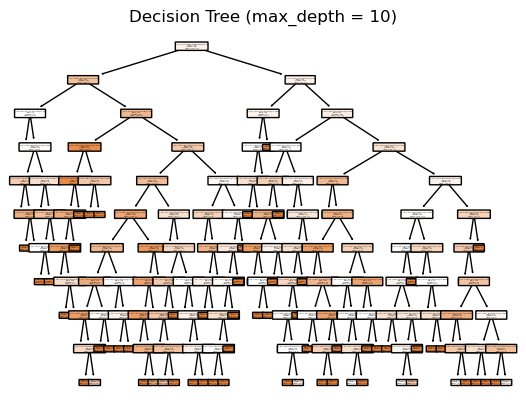

In [46]:
# Visualize the tree and save to file
fig = plt.figure()
plot_tree(dtree, 
          feature_names = X,
          filled=True, 
          rounded=True, 
          proportion=False, 
          precision=2)
plt.title(f"Decision Tree (max_depth = {max_depth})")

In [47]:
# Record the accuracy for both the training and development datasets.
print("\nResults:")
for result in results:
    print(f"max_depth: {result['max_depth']}, Train Accuracy: {result['train_accuracy']:.4f}, Dev Accuracy: {result['dev_accuracy']:.4f}")


Results:
max_depth: 2, Train Accuracy: 0.7891, Dev Accuracy: 0.8182
max_depth: 3, Train Accuracy: 0.7838, Dev Accuracy: 0.7972
max_depth: 4, Train Accuracy: 0.8313, Dev Accuracy: 0.7972
max_depth: 5, Train Accuracy: 0.8594, Dev Accuracy: 0.7762
max_depth: 6, Train Accuracy: 0.8822, Dev Accuracy: 0.7692
max_depth: 7, Train Accuracy: 0.8805, Dev Accuracy: 0.7692
max_depth: 8, Train Accuracy: 0.9086, Dev Accuracy: 0.7552
max_depth: 9, Train Accuracy: 0.9350, Dev Accuracy: 0.7343
max_depth: 10, Train Accuracy: 0.9578, Dev Accuracy: 0.7483


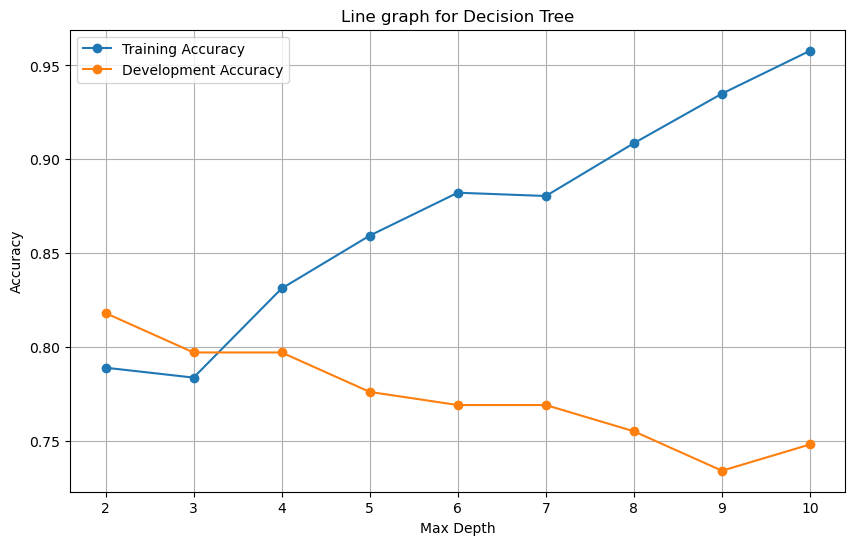

In [48]:
# Plotting the line graph comparing your training accuracies with your development accuracies
plt.figure(figsize=(10, 6))
plt.plot([result['max_depth'] for result in results], [result['train_accuracy'] for result in results], marker='o', label='Training Accuracy')
plt.plot([result['max_depth'] for result in results], [result['dev_accuracy'] for result in results], marker='o', label='Development Accuracy')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.title('Line graph for Decision Tree')
plt.legend()
plt.grid(True)
plt.xticks(range(2, 11))  # Set x-axis ticks to integers
plt.show()

The training accuracy (blue) steadily increasing with max_depth, approaching perfect accuracy. This indicates the model is becoming more complex and fitting the training data very closely. However, the development accuracy (orange) peaks at max_depth 4 and then declines, suggesting that increasing complexity beyond this point possibily leads to overfitting. The model is memorizing noise in the training data rather than learning generalizable patterns, hence performing worse on unseen data (the development set). Therefore, a max_depth of 4 appears optimal, balancing performance on both training and unseen data.

Based on the comparing line graph, a max_depth of 4 appears optimal. While training accuracy continues to rise with increasing max_depth, the development accuracy peaks at 4 and then declines, indicating overfitting beyond that point. Therefore, a max_depth of 4 balances performance on both training and unseen data (the development set).

In [51]:
# Train the final Decision Tree with the current max_depth 4
final_dtree = DecisionTreeClassifier(max_depth=4, random_state=42)
final_dtree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, random_state=42)

In [52]:
# Evaluate on the TEST set
y_test_pred = final_dtree.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f"Test Set Accuracy (max_depth = 4): {test_accuracy}")

Test Set Accuracy (max_depth = 4): 0.770949720670391
